In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("combined_data.csv")

In [3]:
data

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


In [4]:
data.shape

(83448, 2)

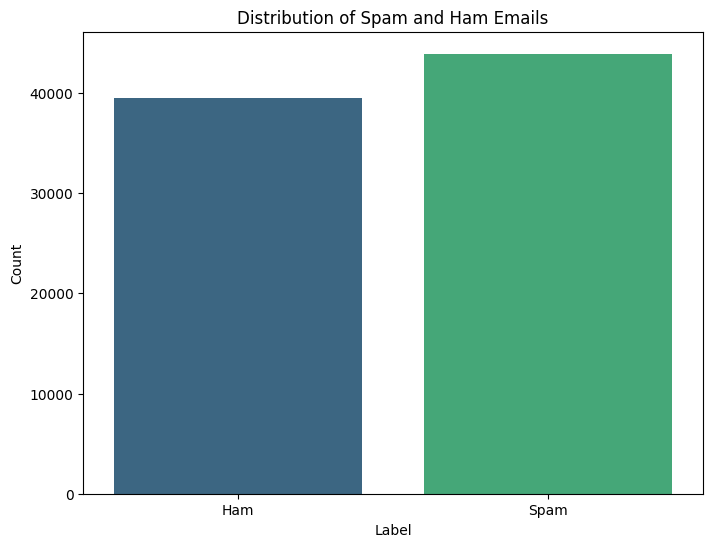

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data, hue='label', palette='viridis', legend=False)
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

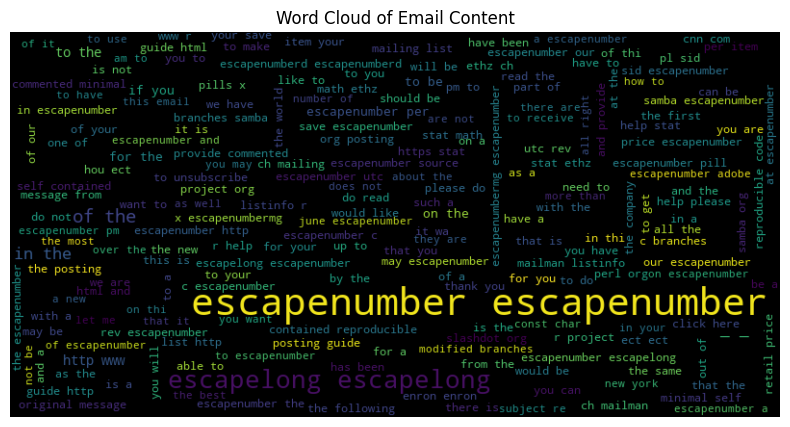

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(data['text'])
wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords='english').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Email Content')
plt.show()

In [9]:
import os
import re
import math
import pandas as pd
from collections import defaultdict, Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

class NaiveBayesSpamClassifier:
    def __init__(self):
        self.spam_word_probs = defaultdict(float)
        self.ham_word_probs = defaultdict(float)
        self.spam_prior = 0.5

    def extract_features(self, email_content):
        words = re.findall(r'\b\w+\b', email_content.lower())
        word_counts = Counter(words)
        num_links = len(re.findall(r'http[s]?://', email_content))
        num_special_chars = len(re.findall(r'[!$%&]', email_content))
        features = {
            'num_words': len(words),
            'num_links': num_links,
            'num_special_chars': num_special_chars,
            **word_counts
        }
        return features

    def train(self, emails, labels):
        spam_counts = defaultdict(int)
        ham_counts = defaultdict(int)
        total_spam_words = total_ham_words = 0

        for email, label in zip(emails, labels):
            word_counts = self.extract_features(email)
            if label == 1:  # Spam
                for word, count in word_counts.items():
                    spam_counts[word] += count
                    total_spam_words += count
            else:  # Ham
                for word, count in word_counts.items():
                    ham_counts[word] += count
                    total_ham_words += count

        # Laplace smoothing
        self.spam_word_probs = {
            word: (count + 1) / (total_spam_words + len(spam_counts))
            for word, count in spam_counts.items()
        }
        self.ham_word_probs = {
            word: (count + 1) / (total_ham_words + len(ham_counts))
            for word, count in ham_counts.items()
        }

    def predict(self, email):
        word_counts = self.extract_features(email)
        spam_score = math.log(self.spam_prior)
        ham_score = math.log(1 - self.spam_prior)

        for word, count in word_counts.items():
            spam_score += count * math.log(self.spam_word_probs.get(word, 1e-6))
            ham_score += count * math.log(self.ham_word_probs.get(word, 1e-6))

        return +1 if spam_score > ham_score else 0

def classify_emails_from_folder(folder_path, classifier):
    results = []
    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith(".txt"):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as f:
                email_content = f.read()
                prediction = classifier.predict(email_content)
                results.append((filename, prediction))
                print(f"{filename}: {'Spam' if prediction == 1 else 'Non spam'} ({prediction})")
    return results

emails = data['text'].tolist()
labels = data['label'].tolist()

X_train, X_test, y_train, y_test = train_test_split(emails, labels, test_size=0.2, random_state=42,stratify=labels)

classifier = NaiveBayesSpamClassifier()
classifier.train(X_train, y_train)

y_pred = [classifier.predict(email) for email in X_test]
y_yt=[classifier.predict(email) for email in X_train]
print("Classification Report for train dataset: \n",classification_report(y_train,y_yt,target_names=["Non-Spam","Spam"]))
print("Accuracy score for train dataset: ", accuracy_score(y_train,y_yt))
print("Confusion Matrix for train dataset: \n", confusion_matrix(y_train,y_yt))
print("\n")
print("Classification Report for test dataset: \n", classification_report(y_test, y_pred, target_names=["Non-Spam", "Spam"]))
print("Accuracy score for test dataset: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix for test dataset: \n", confusion_matrix(y_test, y_pred))

test_folder_path = "test"

if os.path.exists(test_folder_path):
    print("\nClassifying emails from 'test' folder:")
    test_results = classify_emails_from_folder(test_folder_path, classifier)
else:
    print("Error: The specified folder path does not exist. Please check the path.")


Classification Report for train dataset: 
               precision    recall  f1-score   support

    Non-Spam       0.90      0.98      0.94     31630
        Spam       0.98      0.90      0.94     35128

    accuracy                           0.94     66758
   macro avg       0.94      0.94      0.94     66758
weighted avg       0.94      0.94      0.94     66758

Accuracy score for train dataset:  0.9366218280955092
Confusion Matrix for train dataset: 
 [[30871   759]
 [ 3472 31656]]


Classification Report for test dataset: 
               precision    recall  f1-score   support

    Non-Spam       0.93      0.98      0.95      7908
        Spam       0.98      0.93      0.95      8782

    accuracy                           0.95     16690
   macro avg       0.95      0.95      0.95     16690
weighted avg       0.96      0.95      0.95     16690

Accuracy score for test dataset:  0.9534451767525465
Confusion Matrix for test dataset: 
 [[7754  154]
 [ 623 8159]]

Classifying emails